# Setting Parameters and Pre-Processing

In [ ]:
from __future__ import absolute_import
from __future__ import print_function

import os
import itertools
import numpy as np
import scipy.io

import keras
from keras.models import Sequential
from keras.utils import np_utils, to_categorical
from keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam
from sklearn.model_selection import train_test_split

### Parameters ###
batch_size = 128
n_of_classes = 10
n_of_epochs = 20

### Pre-Processing ###
Train = scipy.io.loadmat('train_32x32.mat') 
Test = scipy.io.loadmat('test_32x32.mat') 

X_train = Train['X']
y_train = Train['y']
X_test = Test['X']
y_test = Test['y']

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

X_train = X_train[np.newaxis,:]
X_test = X_test[np.newaxis,:]

X_train = np.swapaxes(X_train,0,4).squeeze()
X_test = np.swapaxes(X_test,0,4).squeeze()

np.place(y_train,y_train == 10,0)
np.place(y_test,y_test == 10,0)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Model Buiding:
A network with 6 hidden layers including 4 convolution layers and 2 dense layers

In [2]:


### Model Building ###
model = Sequential()

model.add(Conv2D(32, kernel_size=3, activation='relu', border_mode='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())

model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=3, activation='relu', border_mode='same'))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(n_of_classes))
model.add(Activation('softmax'))


#compile model using accuracy to measure model performance
#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=batch_size, epochs=n_of_epochs, verbose=1, validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=0)
print('loss:', score[0])
print('Test accuracy:', score[1])

Instructions for updating:
Colocations handled automatically by placer.


/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:55: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, kernel_size=3, activation="relu", input_shape=(32, 32, 3..., padding="same")`


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:63: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, kernel_size=3, activation="relu", padding="same")`


Instructions for updating:
Use tf.cast instead.
Train on 73257 samples, validate on 26032 samples
Epoch 1/20
73257/73257 [==============================] - 154s 2ms/step - loss: 0.9131 - acc: 0.7145 - val_loss: 0.4541 - val_acc: 0.8648
Epoch 2/20
73257/73257 [==============================] - 141s 2ms/step - loss: 0.4291 - acc: 0.8697 - val_loss: 0.3493 - val_acc: 0.8987
Epoch 3/20
73257/73257 [==============================] - 141s 2ms/step - loss: 0.3586 - acc: 0.8916 - val_loss: 0.3173 - val_acc: 0.9097
Epoch 4/20
73257/73257 [==============================] - 139s 2ms/step - loss: 0.3155 - acc: 0.9052 - val_loss: 0.2889 - val_acc: 0.9152
Epoch 5/20
73257/73257 [==============================] - 140s 2ms/step - loss: 0.2875 - acc: 0.9140 - val_loss: 0.2916 - val_acc: 0.9165
Epoch 6/20
73257/73257 [==============================] - 152s 2ms/step - loss: 0.2595 - acc: 0.9216 - val_loss: 0.2997 - val_acc: 0.9149
Epoch 7/20
73257/73257 [==============================] - 155s 2ms/step - 

## Save entire model to a HDF5 file

In [3]:

# Save entire model to a HDF5 file
model.save('CNN_batch_norm.h5')

# Model Parameters:

In [4]:
# Recreate the exact same model, including weights and optimizer.
CNN_batch_norm_model = keras.models.load_model('CNN_batch_norm.h5')
CNN_batch_norm_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
__________

## Performance

In [5]:
loss, acc = CNN_batch_norm_model.evaluate(X_test, y_test)
print("Restored model, loss: {:5.2f}".format(loss))
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

26032/26032 [==============================] - 21s 788us/step
Restored model, loss:  0.28
Restored model, accuracy: 92.89%


# Plotting:

In [6]:
import matplotlib.pyplot as plt
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("Predicted: {} {:2.0f}% (True Class: {})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color) 
    
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
    

In [7]:
predictions = CNN_batch_norm_model.predict(X_test)

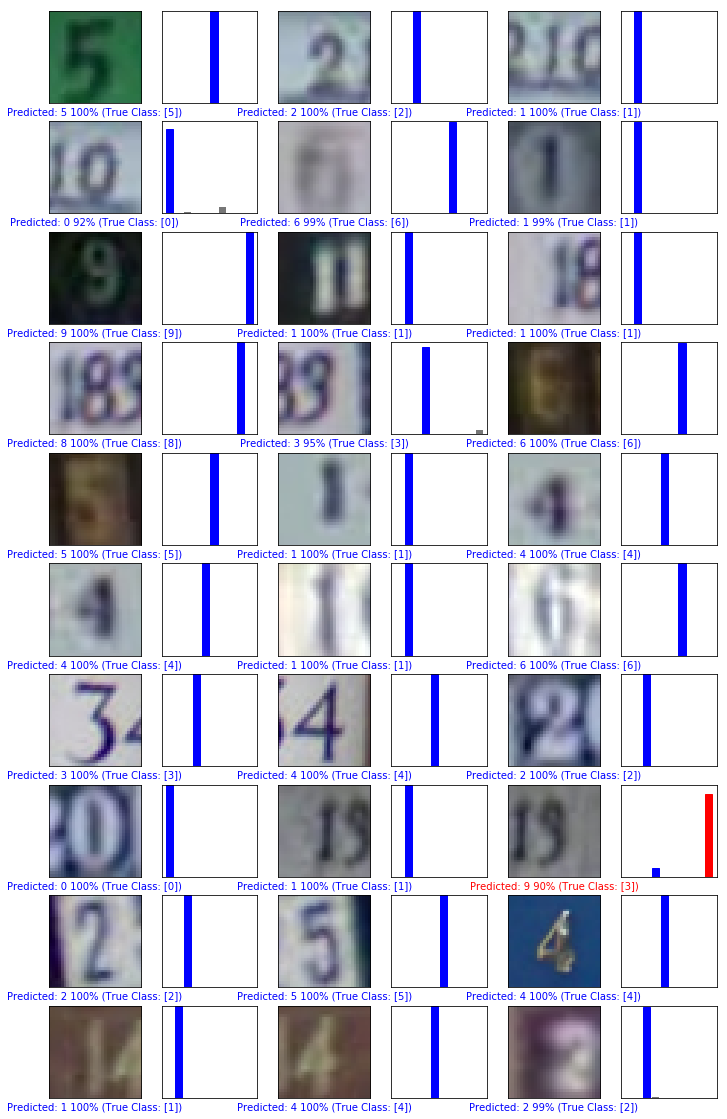

In [8]:
true_y_test = Test['y']
flatten_y_test  = [i for row in true_y_test for i in row]
np.place(y_train,y_train == 10,0)
np.place(true_y_test,true_y_test == 10,0)

# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 10
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions,true_y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, flatten_y_test)
plt.show()